In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("ToyotaCorolla.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
Toyota_data=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Weight"]]
Toyota_data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Weight
0,13500,23,46986,90,2000,3,5,1165
1,13750,23,72937,90,2000,3,5,1165
2,13950,24,41711,90,2000,3,5,1165
3,14950,26,48000,90,2000,3,5,1165
4,13750,30,38500,90,2000,3,5,1170


In [4]:
Toyota_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   cc         1436 non-null   int64
 5   Doors      1436 non-null   int64
 6   Gears      1436 non-null   int64
 7   Weight     1436 non-null   int64
dtypes: int64(8)
memory usage: 89.9 KB


In [5]:
#checking for missing values
Toyota_data.isna().sum()

Price        0
Age_08_04    0
KM           0
HP           0
cc           0
Doors        0
Gears        0
Weight       0
dtype: int64

# Correaltion Matrix

In [6]:
Toyota_data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,1.000000


# Scatterplot B/w variables along with the Histograms

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


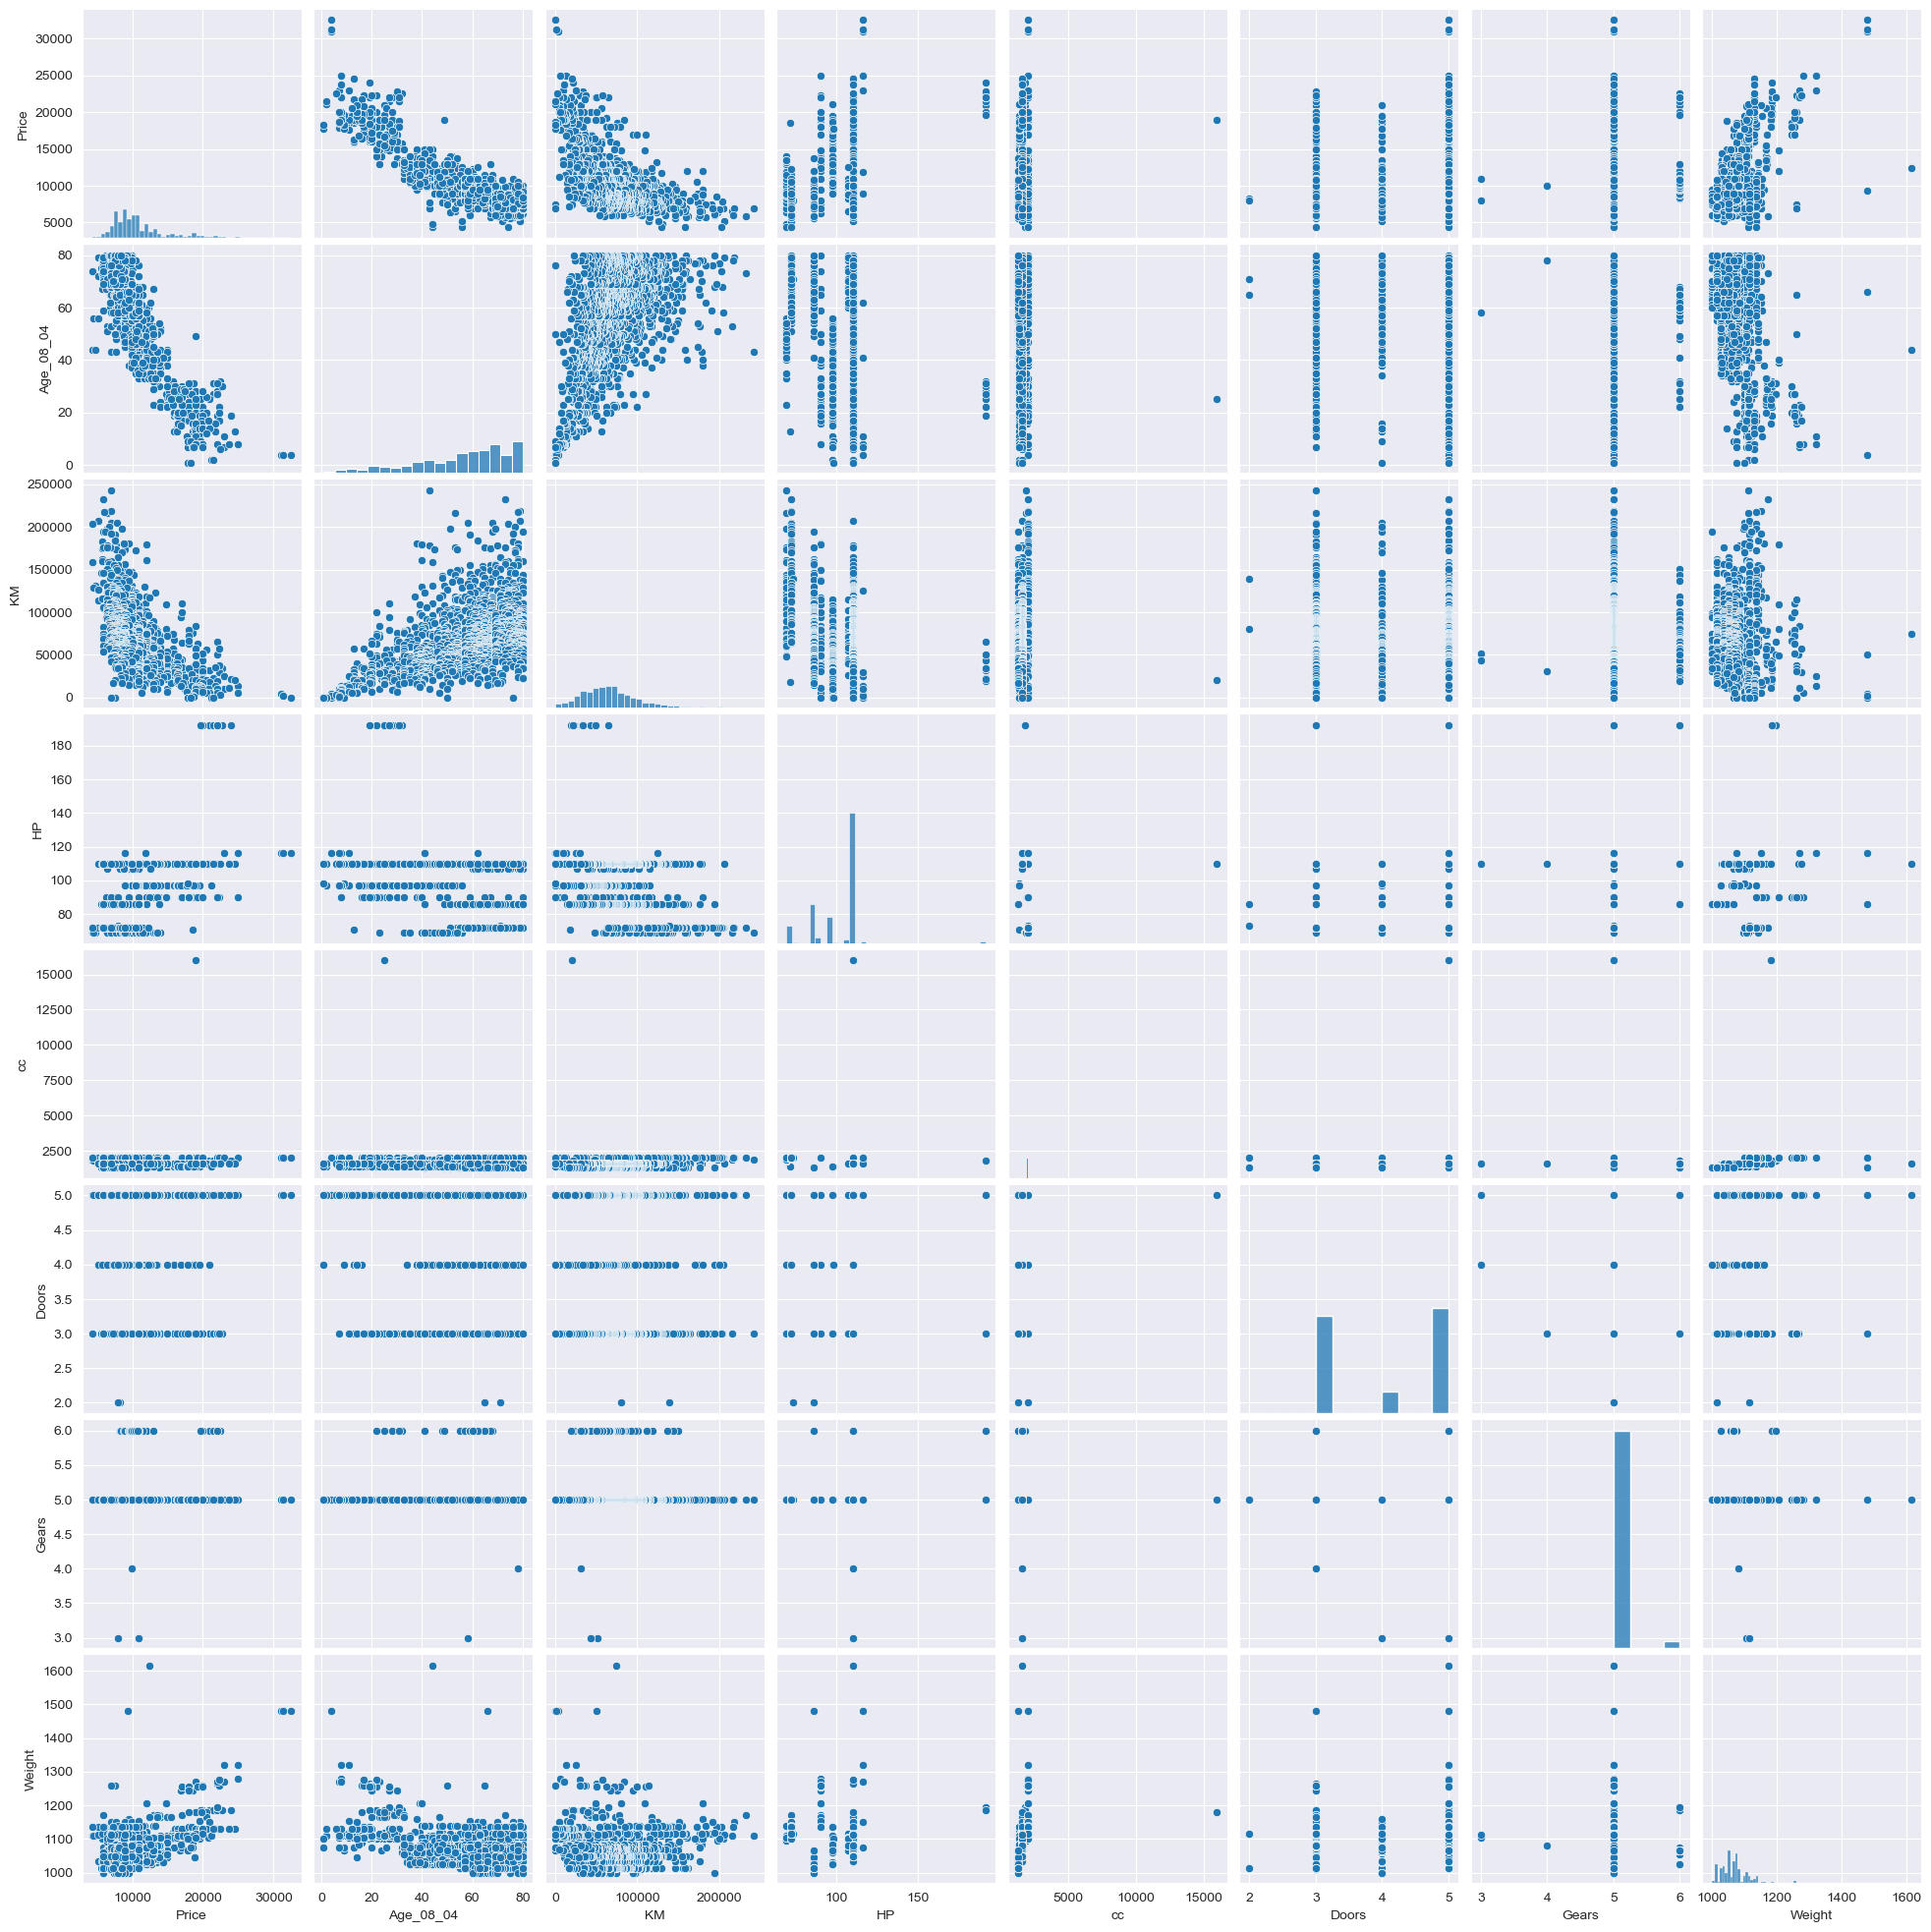

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(Toyota_data)

<Axes: >

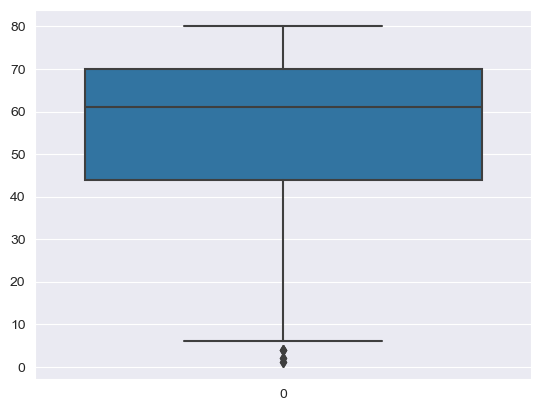

In [8]:
sns.boxplot(Toyota_data['Age_08_04'])

In [9]:
# split the variables as X and Y
Y = Toyota_data["Price"]
X = Toyota_data[['Age_08_04','KM','HP','cc','Weight']]
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
Y_pred = LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y,Y_pred)
print("Mean squared Error", mse.round(2))
import numpy as np
rmse = np.sqrt(mse)
print("Root Mean squared Error", rmse.round(2))

r2 = r2_score(Y,Y_pred)
print("R2_score", r2.round(2))

Mean squared Error 1815813.09
Root Mean squared Error 1347.52
R2_score 0.86


In [10]:
#X = Toyota_data[['Age_08_04','HP','cc','Weight']]
"""Mean squared Error 2143920.28
Root Mean squared Error 1464.21
R2_score 0.84"""

#X = Toyota_data[['Age_08_04','KM','HP','cc','Weight']]
"""Mean squared Error 1815813.09
Root Mean squared Error 1347.52
R2_score 0.86"""

#X = Toyota_data[['cc','Weight']]
"""Mean squared Error 8635328.46
Root Mean squared Error 2938.59
R2_score 0.34"""

#X = Toyota_data[['KM','HP','cc','Weight']]
"""Mean squared Error 4580854.54
Root Mean squared Error 2140.29
R2_score 0.65"""


#X = Toyota_data[['Age_08_04','KM']]
"""Mean squared Error 2760910.65
Root Mean squared Error 1661.6
R2_score 0.79"""

#X = Toyota_data[['KM','HP']]
"""Mean squared Error 8644573.8
Root Mean squared Error 2940.17
R2_score 0.34"""

#X = Toyota_data[['Age_08_04']]
"""Mean squared Error 3044403.46
Root Mean squared Error 1744.82
R2_score 0.77"""

'Mean squared Error 3044403.46\nRoot Mean squared Error 1744.82\nR2_score 0.77'

# Preparing a model

In [11]:
import statsmodels.formula.api as smf
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight",data=Toyota_data).fit()

In [12]:
#coefficients
model.params

Intercept   -7116.713686
Age_08_04    -122.234520
KM             -0.019867
HP             28.480905
cc             -0.088120
Doors         -10.679443
Gears         620.416571
Weight         18.854232
dtype: float64

In [13]:
#t and p-values
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.395759
Age_08_04   -46.725228
KM          -16.344309
HP           10.878217
cc           -0.982650
Doors        -0.266951
Gears         3.142596
Weight       21.781234
dtype: float64 
 Intercept     7.978310e-08
Age_08_04    5.524482e-290
KM            3.531345e-55
HP            1.556180e-26
cc            3.259461e-01
Doors         7.895455e-01
Gears         1.708992e-03
Weight        4.742165e-91
dtype: float64


In [14]:
#R squared values
(model.rsquared,model.rsquared_adj)  # r^2 is Accuraccy of a model and adj_r^2 is if it is increases then variabe is irrilavent

(0.8628951602234526, 0.8622230776755283)

# Simple Linear Regresions Models to check series of variables

In [15]:
ml_1=smf.ols("Price~Age_08_04",data=Toyota_data).fit()
print(ml_1.tvalues, '\n', ml_1.pvalues)
(ml_1.rsquared,ml_1.rsquared_adj)

Intercept    138.907847
Age_08_04    -68.978267
dtype: float64 
 Intercept    0.0
Age_08_04    0.0
dtype: float64


(0.7684108996825327, 0.7682494010072765)

In [16]:
ml_1=smf.ols("Price~KM",data=Toyota_data).fit()
print(ml_1.tvalues, '\n', ml_1.pvalues)
(model.rsquared,model.rsquared_adj)

Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


(0.8628951602234526, 0.8622230776755283)

In [17]:
ml_2=smf.ols("Price~HP",data=Toyota_data).fit()
print(ml_2.tvalues, '\n', ml_2.pvalues)
(ml_2.rsquared,ml_2.rsquared_adj)

Intercept     4.803134
HP           12.567862
dtype: float64 
 Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64


(0.09921859277665879, 0.09859043279951563)

In [18]:
ml_4=smf.ols("Price~Doors",data=Toyota_data).fit()
print(ml_4.tvalues, '\n', ml_4.pvalues)
(ml_4.rsquared,ml_4.rsquared_adj)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


(0.03434555943109774, 0.03367216023962716)

In [19]:
ml_5=smf.ols("Price~Gears",data=Toyota_data).fit()
print(ml_5.tvalues, '\n', ml_5.pvalues)
(ml_5.rsquared,ml_5.rsquared_adj)

Intercept    1.814534
Gears        2.394401
dtype: float64 
 Intercept    0.069804
Gears        0.016775
dtype: float64


(0.003982096785360323, 0.0032875236310964118)

In [20]:
ml_7=smf.ols("Price~Weight",data=Toyota_data).fit()
print(ml_7.tvalues, '\n', ml_7.pvalues)
(ml_7.rsquared,ml_7.rsquared_adj)

Intercept   -20.263590
Weight       27.045855
dtype: float64 
 Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64


(0.33779063704356427, 0.33732884529812746)

In [21]:
ml_8=smf.ols("Price~Age_08_04+KM+HP+cc+Weight",data=Toyota_data).fit()
print(ml_8.tvalues, '\n', ml_8.pvalues)
(ml_8.rsquared,ml_8.rsquared_adj)

Intercept    -4.388629
Age_08_04   -46.664140
KM          -16.074606
HP           11.930907
cc           -0.988770
Weight       22.372752
dtype: float64 
 Intercept     1.224415e-05
Age_08_04    1.238049e-289
KM            1.418483e-53
HP            2.377142e-31
cc            3.229430e-01
Weight        2.638577e-95
dtype: float64


(0.861870305617451, 0.8613873346580715)

# Calculating VIF

In [22]:
import statsmodels.formula.api as smf

model1 = smf.ols('KM ~Age_08_04+HP+Doors+Gears+cc+Weight',data=Toyota_data).fit()
model1.rsquared

0.39232541851317704

In [23]:
model1_Vif = 1/(1-(model1.rsquared))
model1_Vif

1.645617622434129

In [24]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     KM   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     153.8
Date:                Fri, 03 May 2024   Prob (F-statistic):          1.07e-150
Time:                        17:13:27   Log-Likelihood:                -16804.
No. Observations:                1436   AIC:                         3.362e+04
Df Residuals:                    1429   BIC:                         3.366e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.93e+05   2.82e+04     -6.833      0.000   -2.48e+05   -1.38e+05
Age_08_04   1176.1958     47.678     24.669      0.000    1082.669    1269.723
HP          -707.7150     53.816    -13.151      0.000    -813.281    -602.149
Doors        366.7468    870.583      0.421      0.674   -1341.011    2074.504
Gears       1.446e+04   4279.436      3.379      0.001    6065.368    2.29e+04
cc             7.8388      1.941      4.039      0.000       4.032      11.645
Weight       168.8196     18.301      9.224      0.000     132.919     204.720
==============================================================================
Omnibus:                      185.359   Durbin-Watson:                   0.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              446.160
Skew:                           0.726   Prob(JB):                     1.31e-97
Kurtosis:                       5.313   Cond. No.                     7.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model2 = smf.ols('Age_08_04~KM+HP+Doors+Gears+cc+Weight',data=Toyota_data).fit()

model2.rsquared

0.46654108994241805

In [26]:
model3 = smf.ols('HP ~Age_08_04+KM+Doors+cc+Weight',data=Toyota_data).fit()
model4 = smf.ols('Doors ~Age_08_04+HP+Gears+Doors+cc+Weight',data=Toyota_data).fit()
model5 = smf.ols('Gears ~Age_08_04+HP+Doors+cc+Weight',data=Toyota_data).fit()
model6 = smf.ols('Weight ~Age_08_04+HP+Doors+Gears+cc+Weight',data=Toyota_data).fit()
model7 = smf.ols('cc ~Age_08_04+HP+Doors+Gears+cc+Weight',data=Toyota_data).fit()

# Residual analysis

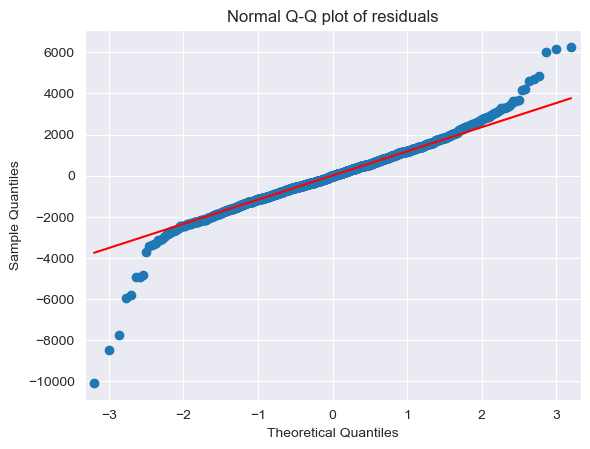

In [27]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') #line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [28]:
list(np.where(model.resid>4000)) #it show the which are the outliers by the graphs > 

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]

In [29]:
#Residual plot for homoscedasticity it mean the data points are in non-linear
def get_standardized_values( vals ):
    return(vals - vals.mean())/vals.std()   #we are going to normalize the error by useing z-score

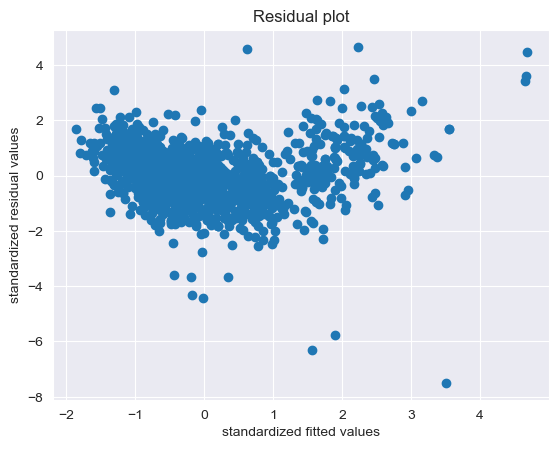

In [30]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title("Residual plot")
plt.xlabel("standardized fitted values")
plt.ylabel("standardized residual values")
plt.show()

# cook's distance

In [31]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

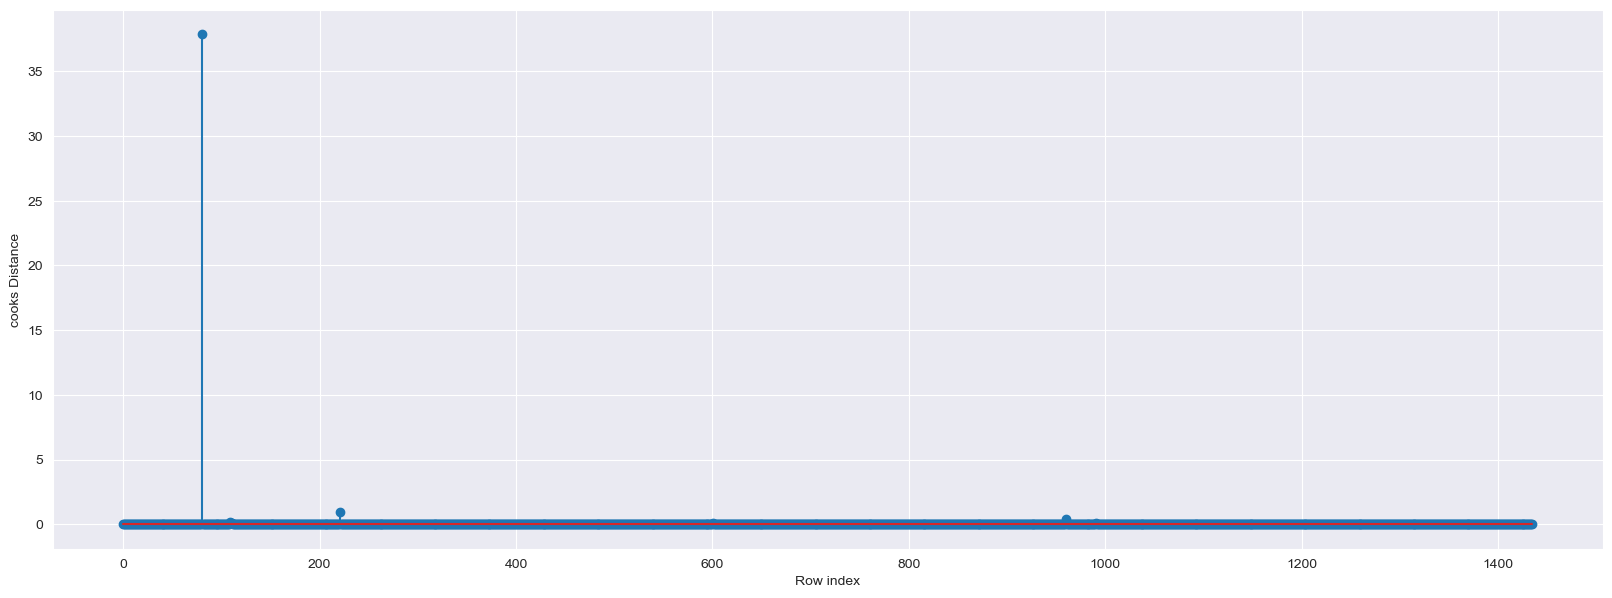

In [32]:
#plot the influcence values using stem plot
import matplotlib.pyplot as plt
import numpy as np
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Toyota_data)),np.round(c, 2)) #c is cooks distance
plt.xlabel("Row index")
plt.ylabel("cooks Distance")
plt.show()   # so the points which are far from the cook's distance that has to remove because it could be outlers or influence data point

In [33]:
#let find highest cooks distance value and index data point
#np.index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))  # output which is got that data point has to remove


(80, 37.872161161187)

# High Influence point

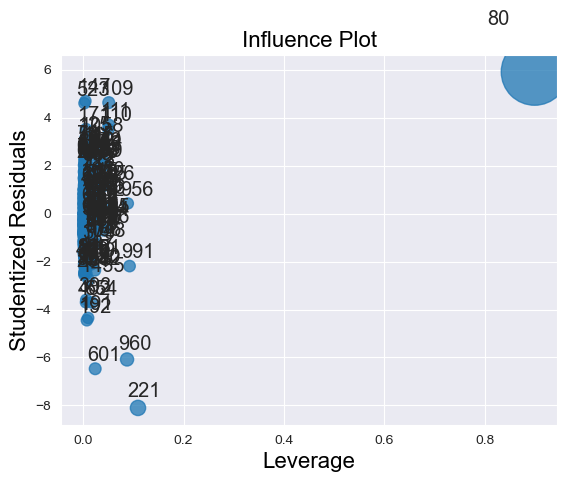

In [34]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show() 
# the points show based on the size of the data point so like high hat value that influence the regresion line 
#so 80 came out as influence data point as shown above in the cell

In [35]:
k = Toyota_data.shape[1]  # k is no.of columns
n = Toyota_data.shape[0]  # n is number of data points in it
leverage_cutoff = 3*((k + 1)/n)

In [36]:
leverage_cutoff # so 0.02 means as in plot there is only one which is 80

0.018802228412256268

# From above plot, it is evident that data point 80 is influencers

In [37]:
Toyota_data[Toyota_data.index.isin([922,956,991,80])] #this record should be pulled

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Weight
80,18950,25,20019,110,16000,5,5,1180
922,9950,63,57000,110,1600,3,5,1050
956,10950,58,51421,110,1600,5,3,1105
991,7950,58,43000,110,1600,4,3,1114


In [38]:
Toyota_data.head(10)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Weight
0,13500,23,46986,90,2000,3,5,1165
1,13750,23,72937,90,2000,3,5,1165
2,13950,24,41711,90,2000,3,5,1165
3,14950,26,48000,90,2000,3,5,1165
4,13750,30,38500,90,2000,3,5,1170
5,12950,32,61000,90,2000,3,5,1170
6,16900,27,94612,90,2000,3,5,1245
7,18600,30,75889,90,2000,3,5,1245
8,21500,27,19700,192,1800,3,5,1185
9,12950,23,71138,69,1900,3,5,1105


# improving the model

In [39]:
#load the data
Toyota_new = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Weight"]]

In [40]:
#Discard the data points which are influences and reassign the row number (reset_index())
car1=Toyota_new.drop(Toyota_new.index[[80]],axis=0).reset_index()

In [41]:
#drop the original index
car1=car1.drop(['index'],axis=1)

In [42]:
car1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Weight
0,13500,23,46986,90,2000,3,5,1165
1,13750,23,72937,90,2000,3,5,1165
2,13950,24,41711,90,2000,3,5,1165
3,14950,26,48000,90,2000,3,5,1165
4,13750,30,38500,90,2000,3,5,1170
...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,1025
1431,10845,72,19000,86,1300,3,5,1015
1432,8500,71,17016,86,1300,3,5,1015
1433,7250,70,16916,86,1300,3,5,1015


# build Model

In [43]:
#excluding variable "Doors	Gears	Quarterly_Tax" and gernarate R-squared and AIC values
final_ml_v = smf.ols("Price ~Age_08_04+KM+HP+cc+Weight",data=car1).fit()

In [44]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.8645947090820576, 24732.90200636056)

# Predicting for new data

In [45]:
New_data = pd.DataFrame({'Age_08_04':34,'KM':1298,'HP':66,'cc':1400,'Weight':1022},index=[1])

In [46]:
New_data

,Age_08_04,KM,HP,cc,Weight
1,34,1298,66,1400,1022


In [47]:
final_ml_v.predict(New_data)

1    12532.480174
dtype: float64